In [1]:
import pickle
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pathlib import Path

%config InlineBackend.figure_format = 'retina'

In [182]:
# plot options
ALPHA_ = 1.0
FIGSIZE_ = (7, 4)

In [183]:
BENCH_NAME = "ur10_ballistic"


def load_files(bench_name):
    basepath = Path(bench_name)
    all_csv = list(basepath.glob("*.csv"))
    all_pkl = list(basepath.glob("*.pkl"))
    nr = len(all_csv)

    dfs = []
    suppl_data = {}
    for i in range(nr):
        dfs.append(pl.read_csv(all_csv[i]))
        with open(all_pkl[i], "rb") as f:
            suppl_data.update(pickle.load(f))
    df = pl.concat(dfs)
    return df, suppl_data, len(dfs)


def get_solver_config(supp_entry):
    return supp_entry["solver"]


df_, suppl_data_, num_instances = load_files(BENCH_NAME)
df_ = df_.with_columns(avg_iter_time=pl.col("solve_time_s") / pl.col("niter"))
print(f"Num. instances: {num_instances}")

Num. instances: 50


Create aliases for the unique configurations

In [184]:
solver_configs_ = [
    {**entry["solver"], "run_id": run_id} for run_id, entry in suppl_data_.items()
]

sc_df = pl.DataFrame(solver_configs_)
sc_df = sc_df.sort("config_name")
sc_df

name,config_name,mu_init,tol_stationarity,verbose,max_iters,run_id,print_level,default_start,hessian_approximation,rollout_type,ls_eta
str,str,f64,f64,bool,i64,str,i64,bool,str,str,f64
"""ALTRO""","""ALTRO:0""",1.0,0.0001,false,400,"""4396c99724914491bbcff9a356e84b…",null,null,null,null,null
"""ALTRO""","""ALTRO:0""",1.0,0.0001,false,400,"""c9195a9a35314e90be868ec2d3b30c…",null,null,null,null,null
"""ALTRO""","""ALTRO:0""",1.0,0.0001,false,400,"""32ba6c132d9b42e2a99de7799e4587…",null,null,null,null,null
"""ALTRO""","""ALTRO:0""",1.0,0.0001,false,400,"""c1ed8d631c054857b909b9d6fafc69…",null,null,null,null,null
"""ALTRO""","""ALTRO:0""",1.0,0.0001,false,400,"""e8bebe02fba1471bae792864b8b3c7…",null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…
"""ProxDDP""","""ProxDDP:3""",0.1,null,false,400,"""a4351645bb73452297e050769607ca…",null,false,null,"""linear""",0.85
"""ProxDDP""","""ProxDDP:3""",0.1,null,false,400,"""e4f7ab35988a497a91df2f20b4350a…",null,false,null,"""linear""",0.85
"""ProxDDP""","""ProxDDP:3""",0.1,null,false,400,"""2f2e0d09678f403088783a9a981a45…",null,false,null,"""linear""",0.85


In [185]:
sc_df.drop("run_id").unique(maintain_order=True)

name,config_name,mu_init,tol_stationarity,verbose,max_iters,print_level,default_start,hessian_approximation,rollout_type,ls_eta
str,str,f64,f64,bool,i64,i64,bool,str,str,f64
"""ALTRO""","""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null
"""ALTRO""","""ALTRO:1""",1.0,0.00001,false,400,null,null,null,null,null
"""Ipopt""","""Ipopt:0""",null,null,false,400,2,false,"""exact""",null,null
"""Ipopt""","""Ipopt:1""",null,null,false,400,2,false,"""limited-memory""",null,null
"""ProxDDP""","""ProxDDP:0""",1.0,null,false,400,null,false,null,"""nonlinear""",0.0
"""ProxDDP""","""ProxDDP:1""",0.1,null,false,400,null,false,null,"""linear""",0.0
"""ProxDDP""","""ProxDDP:2""",1.0,null,false,400,null,false,null,"""nonlinear""",0.85
"""ProxDDP""","""ProxDDP:3""",0.1,null,false,400,null,false,null,"""linear""",0.85


In [186]:
config_names = sc_df["config_name"].unique().sort()
config_names

config_name
str
"""ALTRO:0"""
"""ALTRO:1"""
"""Ipopt:0"""
"""Ipopt:1"""
"""ProxDDP:0"""
"""ProxDDP:1"""
"""ProxDDP:2"""
"""ProxDDP:3"""


In [187]:
palette = sns.color_palette("tab10", len(config_names))
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)]

In [188]:
df_fused = df_.join(sc_df, ["run_id", "name"])
df_fused

name,run_id,instance,status,traj_cost,niter,prim_feas,dual_feas,solve_time_s,nsteps,avg_iter_time,config_name,mu_init,tol_stationarity,verbose,max_iters,print_level,default_start,hessian_approximation,rollout_type,ls_eta
str,str,str,str,f64,i64,f64,f64,f64,i64,f64,str,f64,f64,bool,i64,i64,bool,str,str,f64
"""ALTRO""","""4396c99724914491bbcff9a356e84b…","""UR10_Ballistic_6""","""CONVERGED""",1.606321,149,0.000002,0.000079,2.993421,200,0.02009,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null
"""ALTRO""","""c9195a9a35314e90be868ec2d3b30c…","""UR10_Ballistic_29""","""MAXITERATIONS""",0.638823,401,7.8537e-7,0.011756,6.126084,200,0.015277,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null
"""ALTRO""","""32ba6c132d9b42e2a99de7799e4587…","""UR10_Ballistic_17""","""CONVERGED""",0.993605,266,0.000002,0.000052,5.069004,200,0.019056,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null
"""ALTRO""","""c1ed8d631c054857b909b9d6fafc69…","""UR10_Ballistic_31""","""CONVERGED""",0.479895,77,1.2394e-7,0.000087,2.95421,200,0.038366,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null
"""ALTRO""","""e8bebe02fba1471bae792864b8b3c7…","""UR10_Ballistic_36""","""ERROR""",0.974143,80,1.8298e-7,0.001186,2.920423,200,0.036505,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ProxDDP""","""a4351645bb73452297e050769607ca…","""UR10_Ballistic_20""","""CONVERGED""",0.594721,126,6.2643e-7,0.000009,2.55418,200,0.020271,"""ProxDDP:3""",0.1,null,false,400,null,false,null,"""linear""",0.85
"""ProxDDP""","""e4f7ab35988a497a91df2f20b4350a…","""UR10_Ballistic_10""","""CONVERGED""",0.939331,173,3.0245e-7,0.00001,3.65328,200,0.021117,"""ProxDDP:3""",0.1,null,false,400,null,false,null,"""linear""",0.85
"""ProxDDP""","""2f2e0d09678f403088783a9a981a45…","""UR10_Ballistic_46""","""CONVERGED""",0.116059,14,0.000009,0.000004,0.318405,200,0.022743,"""ProxDDP:3""",0.1,null,false,400,null,false,null,"""linear""",0.85


In [189]:
expr_ok = pl.col("status") == "CONVERGED"
df_ok = df_fused.filter(expr_ok)

g = df_ok.group_by("config_name")
df_niter = g.agg(pl.col("niter").sort())
df_niter = df_niter.sort("config_name")
df_niter

config_name,niter
str,list[i64]
"""ALTRO:0""","[33, 63, … 266]"
"""ALTRO:1""","[84, 86, … 142]"
"""Ipopt:0""","[28, 31, … 284]"
"""Ipopt:1""","[300, 323, … 400]"
"""ProxDDP:0""","[14, 15, … 336]"
"""ProxDDP:1""","[14, 14, … 223]"
"""ProxDDP:2""","[14, 16, … 325]"
"""ProxDDP:3""","[14, 14, … 394]"


In [190]:
config_names_ok = df_ok["config_name"].unique()
print(config_names_ok)

subpalette = [
    palette[i] for i in range(len(config_names)) if config_names[i] in config_names_ok
]
subpalette = sns.color_palette(subpalette)
subpalette

shape: (8,)
Series: 'config_name' [str]
[
	"ProxDDP:1"
	"ALTRO:0"
	"ProxDDP:0"
	"ALTRO:1"
	"ProxDDP:3"
	"ProxDDP:2"
	"Ipopt:0"
	"Ipopt:1"
]


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)]

In [191]:
sns.set_palette(subpalette)

In [192]:
max_iters = df_ok["max_iters"].max()
iterr = np.arange(1, max_iters)

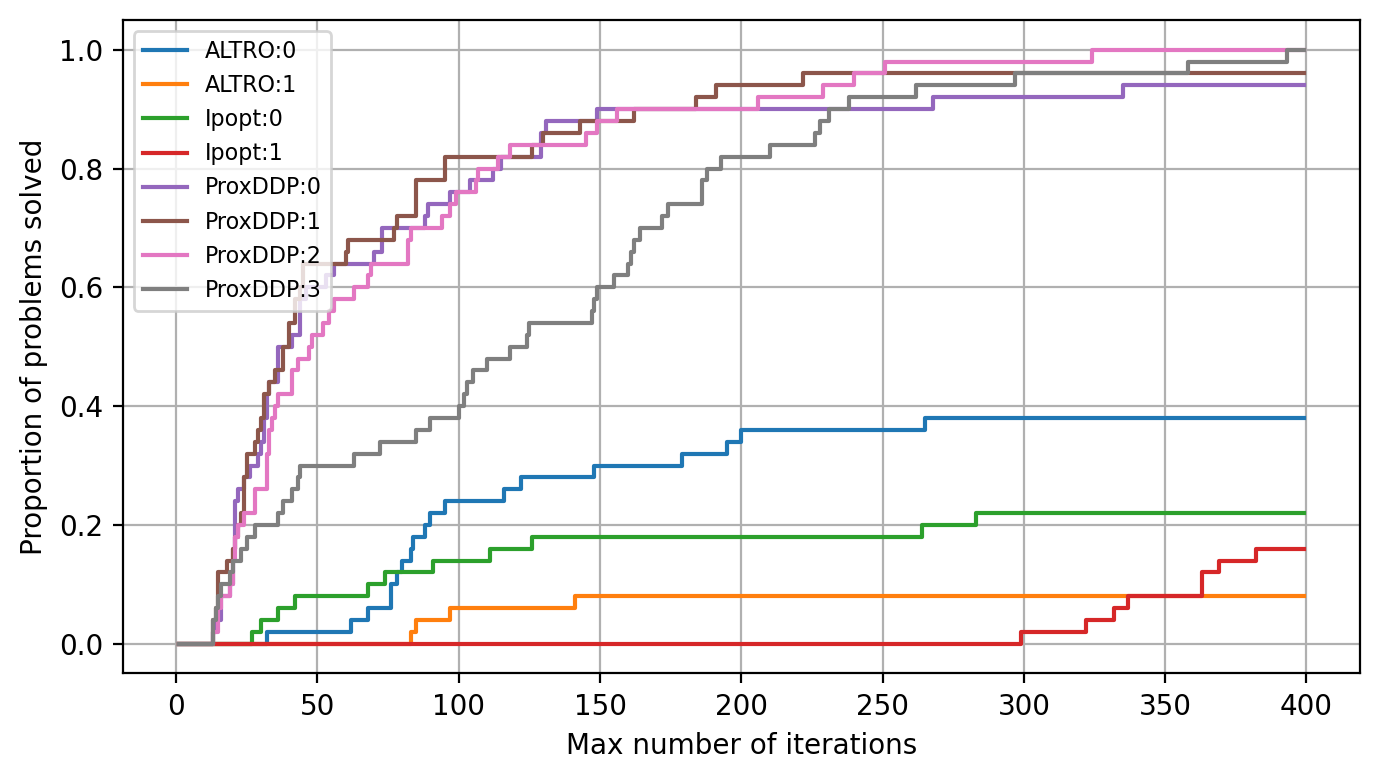

In [193]:
fig = plt.figure(figsize=FIGSIZE_)

for row in df_niter.iter_rows():
    lab = row[0]
    mask = iterr[:, None] >= np.asarray(row[1])
    counts = mask.sum(axis=1) / num_instances
    plt.step(iterr, counts, label=lab, alpha=ALPHA_)

plt.xlabel("Max number of iterations")
plt.ylabel("Proportion of problems solved")
plt.ylim((-0.05, 1.05))
plt.legend(fontsize=8)
plt.grid()
plt.tight_layout()

fig.savefig(f"{BENCH_NAME}_iterations.pdf")
fig.savefig(f"{BENCH_NAME}_iterations.png")

Now we look at final tolerances

In [140]:
solve_time_q90 = df_ok["solve_time_s"].quantile(0.99)
print("solve_time_s quantile:", solve_time_q90)

df_min_time = g.agg(pl.col("solve_time_s")).sort("config_name")
df_min_time

solve_time_s quantile: 38.16283106803894


config_name,solve_time_s
str,list[f64]
"""ALTRO:0""","[2.993421, 5.069004, … 3.632521]"
"""ALTRO:1""","[1.693776, 4.505767, … 2.681374]"
"""Ipopt:0""","[13.089509, 6.78348, … 3.994081]"
"""Ipopt:1""","[39.975397, 37.630732, … 38.162831]"
"""ProxDDP:0""","[4.232441, 24.359815, … 0.573791]"
"""ProxDDP:1""","[8.632215, 1.25453, … 1.343254]"
"""ProxDDP:2""","[2.180552, 1.483991, … 1.045516]"
"""ProxDDP:3""","[2.546171, 0.317639, … 3.318159]"


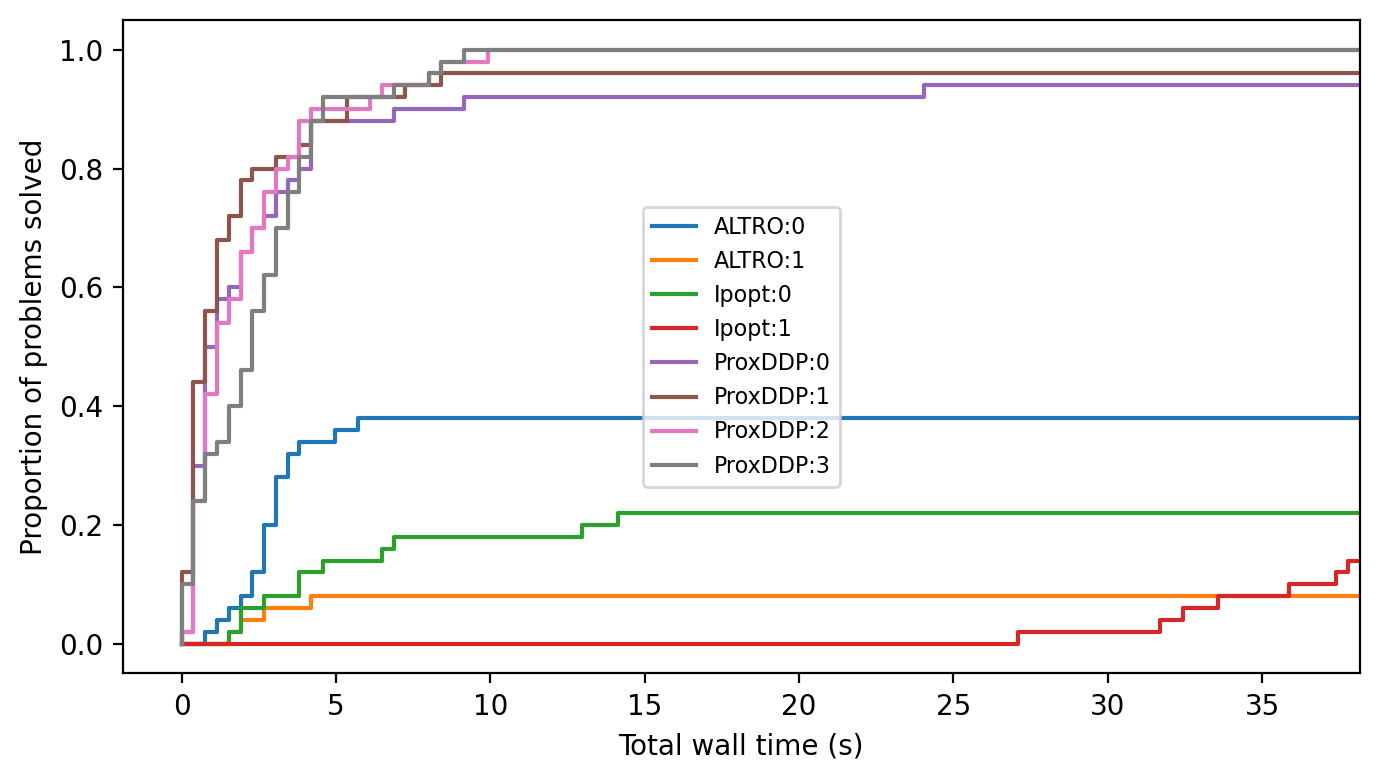

In [141]:
fig2 = plt.figure(figsize=FIGSIZE_)

for row in df_min_time.iter_rows():
    lab = row[0]
    _times = np.linspace(0.0, solve_time_q90, 101)
    mask = _times[:, None] >= np.asarray(row[1])
    counts = mask.sum(axis=1) / num_instances
    plt.step(_times, counts, label=lab, alpha=ALPHA_)

plt.xlabel("Total wall time (s)")
plt.ylabel("Proportion of problems solved")
plt.xlim((-0.05 * solve_time_q90, solve_time_q90))
plt.ylim((-0.05, 1.05))
plt.legend(fontsize=8)
plt.tight_layout()

fig2.savefig(f"{BENCH_NAME}_solve_times.pdf")
fig2.savefig(f"{BENCH_NAME}_solve_times.png")

# Average times

In [142]:
df_repl_avg = df_fused.filter(
    (pl.col("status") != "ERROR") & pl.col("config_name").is_in(config_names_ok)
)

# df_repl_avg = df_fused.filter(pl.col("config_name").is_in(config_names_ok))

7.2 4.8


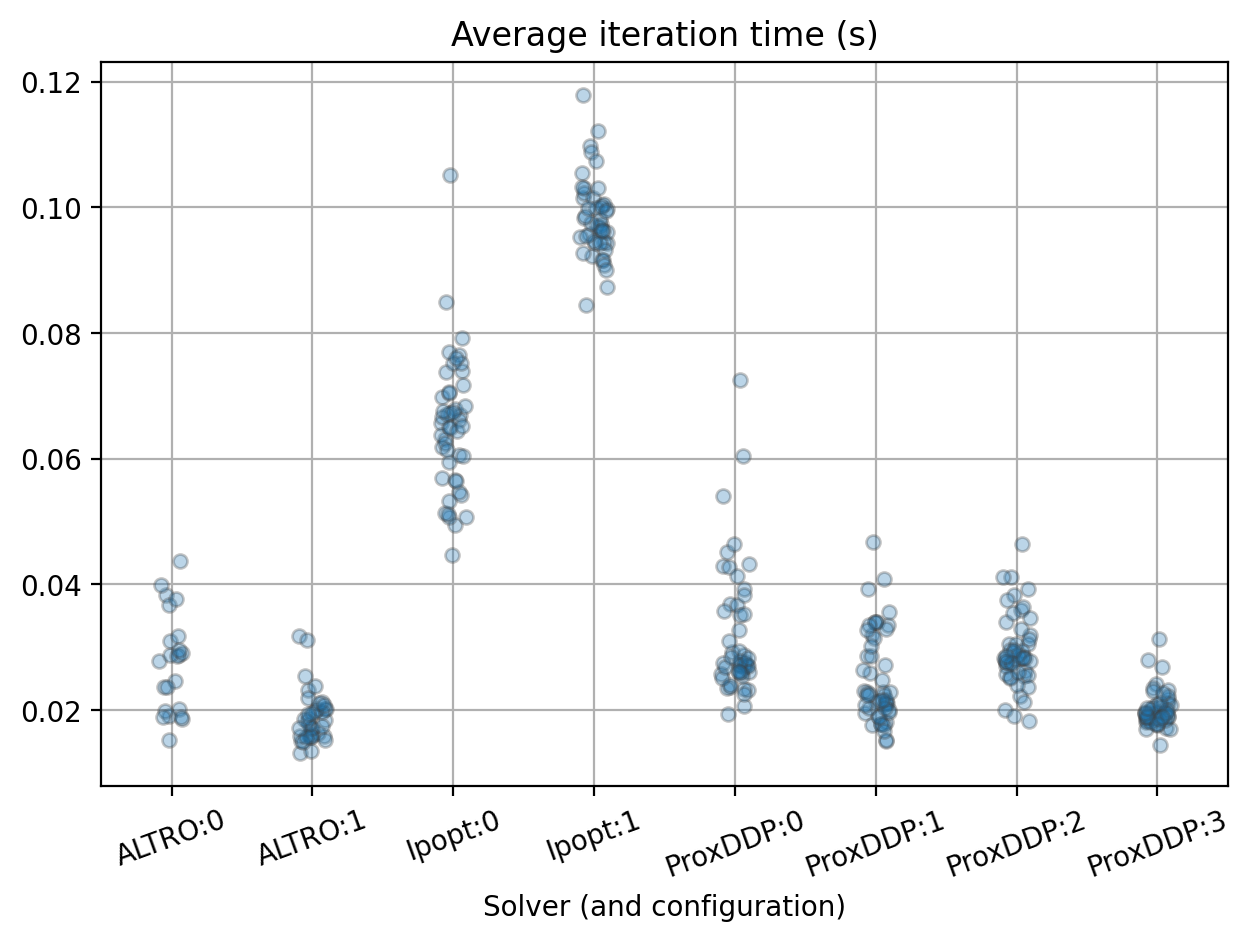

In [143]:
# ax = sns.violinplot(data=df_repl_avg, x="config_name", y="avg_iter_time", cut=0, fill=True, inner="point", saturation=1.0)
ax = sns.stripplot(
    data=df_repl_avg,
    x="config_name",
    y="avg_iter_time",
    linewidth=1,
    alpha=0.3,
)
ax.xaxis.set_tick_params(rotation=20)
ax.set_axisbelow(True)
ax.grid(which="minor", axis="y")
ax.set_title("Average iteration time (s)")
fig = ax.get_figure()
print(fig.get_figwidth(), fig.get_figheight())
fig.set_figwidth(6.4)
ax.grid(axis="both")
ax.set_xlabel("Solver (and configuration)")
ax.set_ylabel("")
fig.tight_layout()
fig.savefig(f"{BENCH_NAME}_avg_time_violin.pdf")

# Performance profile

In [144]:
g2 = df_ok.group_by("instance")
best_times = g2.agg(best_time_s=pl.col("solve_time_s").min())

df_best_times = df_ok.join(best_times, on="instance")
df_best_times = df_best_times.with_columns(
    perf_ratio_s=pl.col("solve_time_s") / pl.col("best_time_s")
)
df_best_times

name,run_id,instance,status,traj_cost,niter,prim_feas,dual_feas,solve_time_s,nsteps,avg_iter_time,config_name,mu_init,tol_stationarity,verbose,max_iters,print_level,default_start,hessian_approximation,rollout_type,ls_eta,best_time_s,perf_ratio_s
str,str,str,str,f64,i64,f64,f64,f64,i64,f64,str,f64,f64,bool,i64,i64,bool,str,str,f64,f64,f64
"""ALTRO""","""4396c99724914491bbcff9a356e84b…","""UR10_Ballistic_6""","""CONVERGED""",1.606321,149,0.000002,0.000079,2.993421,200,0.02009,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null,2.180552,1.372781
"""ALTRO""","""32ba6c132d9b42e2a99de7799e4587…","""UR10_Ballistic_17""","""CONVERGED""",0.993605,266,0.000002,0.000052,5.069004,200,0.019056,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null,0.82035,6.179071
"""ALTRO""","""c1ed8d631c054857b909b9d6fafc69…","""UR10_Ballistic_31""","""CONVERGED""",0.479895,77,1.2394e-7,0.000087,2.95421,200,0.038366,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null,0.408277,7.235803
"""ALTRO""","""d5d169f0500940f7975d4f3d226f2a…","""UR10_Ballistic_48""","""CONVERGED""",0.482318,201,0.000002,0.000098,5.786067,200,0.028786,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null,0.280815,20.604542
"""ALTRO""","""25b838e57e31419dbeba80a486c9b9…","""UR10_Ballistic_24""","""CONVERGED""",0.922113,196,0.000002,0.000015,3.900841,200,0.019902,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null,null,null,0.743839,5.244202
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ProxDDP""","""a4351645bb73452297e050769607ca…","""UR10_Ballistic_20""","""CONVERGED""",0.594721,126,6.2643e-7,0.000009,2.55418,200,0.020271,"""ProxDDP:3""",0.1,null,false,400,null,false,null,"""linear""",0.85,1.53304,1.666088
"""ProxDDP""","""e4f7ab35988a497a91df2f20b4350a…","""UR10_Ballistic_10""","""CONVERGED""",0.939331,173,3.0245e-7,0.00001,3.65328,200,0.021117,"""ProxDDP:3""",0.1,null,false,400,null,false,null,"""linear""",0.85,2.388554,1.529494
"""ProxDDP""","""2f2e0d09678f403088783a9a981a45…","""UR10_Ballistic_46""","""CONVERGED""",0.116059,14,0.000009,0.000004,0.318405,200,0.022743,"""ProxDDP:3""",0.1,null,false,400,null,false,null,"""linear""",0.85,0.318405,1.0


In [145]:
g3 = df_best_times.group_by("config_name")

df_perf_ratios = g3.agg(pl.col("perf_ratio_s")).sort("config_name")

worst_perf_ratio = df_best_times["perf_ratio_s"].max()
print("Word perf. ratio:", worst_perf_ratio)

df_perf_ratios

Word perf. ratio: 139.65143091958896


config_name,perf_ratio_s
str,list[f64]
"""ALTRO:0""","[1.372781, 6.179071, … 4.753467]"
"""ALTRO:1""","[3.728178, 7.990682, … 8.421269]"
"""Ipopt:0""","[41.208775, 16.614904, … 12.544031]"
"""Ipopt:1""","[97.912488, 27.08284, … 139.651431]"
"""ProxDDP:0""","[1.940995, 76.690281, … 1.0]"
"""ProxDDP:1""","[3.958729, 3.949549, … 2.341016]"
"""ProxDDP:2""","[1.0, 4.671943, … 1.82212]"
"""ProxDDP:3""","[1.167672, 1.0, … 5.782868]"


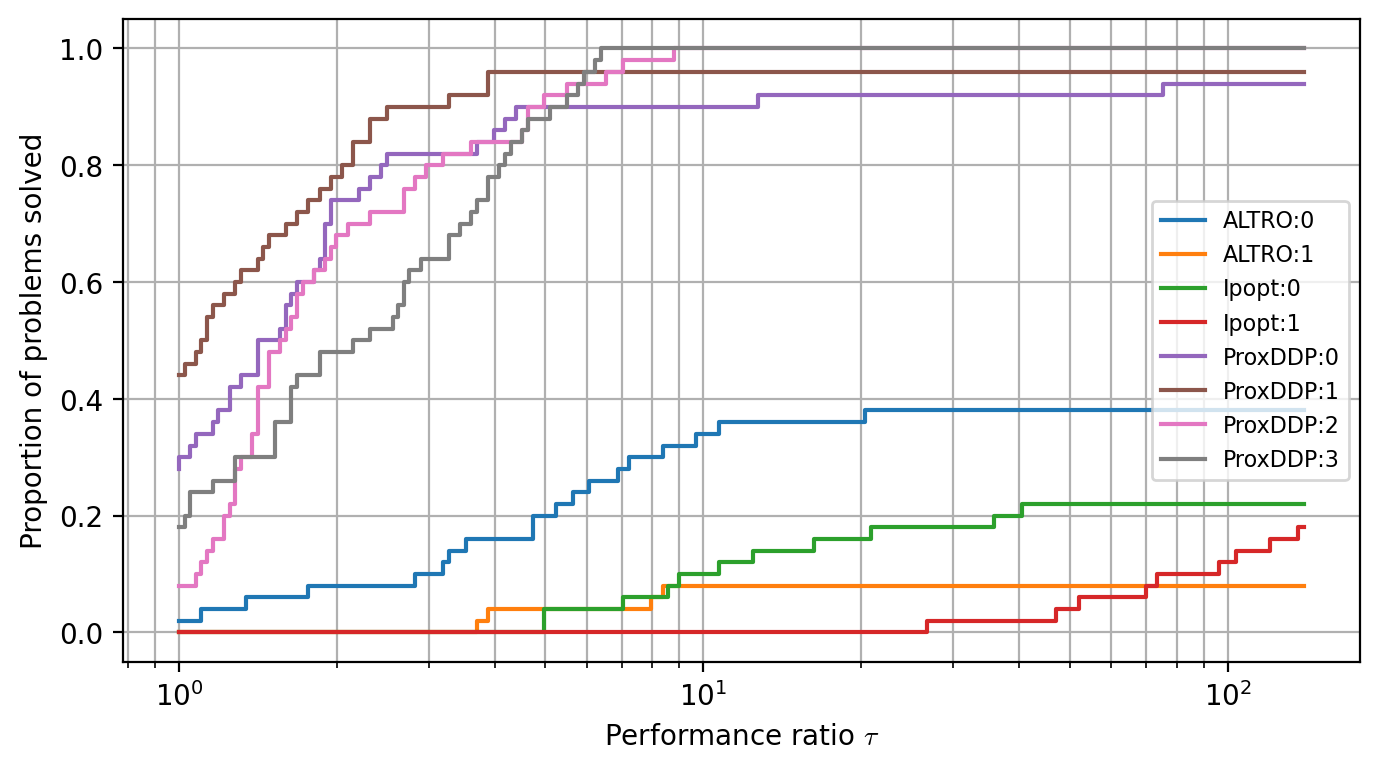

In [146]:
fig = plt.figure(figsize=FIGSIZE_)

xvals_ = np.power(10, np.linspace(0.0, np.log10(worst_perf_ratio), 201))

for cname, perfratios in df_perf_ratios.iter_rows():
    mask = xvals_[:, None] >= np.asarray(perfratios)
    counts = mask.sum(axis=1) / num_instances
    plt.step(xvals_, counts, label=cname, alpha=ALPHA_)

plt.xlabel("Performance ratio $\\tau$")
plt.ylabel("Proportion of problems solved")
plt.ylim((-0.05, 1.05))
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid()
plt.grid(which="minor")
plt.tight_layout()

fig.savefig(f"{BENCH_NAME}_perfprofile_time.pdf")
fig.savefig(f"{BENCH_NAME}_perfprofile_time.png")